# 列舉所有資產的riskiness r

In [1]:
import sympy
import math
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy  as  np
rlist = np.arange(0,100,10)

In [3]:
def cal_riskiness_index(arr_returns):
    arr_x = []
    arr_y = []
    for x in rlist:  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< i change
        if x == 0:
            continue
        x = x
        arr_x.append(x)
        s = 0
        for r in arr_returns:
            s = s + math.exp(-1*r/x)
        y = s / len(arr_returns)
        arr_y.append(y)
    return(arr_x,arr_y)

# 無風險利率
* 我們須扣除無風險利率，得到超額報酬率以計算Riskiness r
* 目前使用LIBOR [1個月利率](https://www.global-rates.com/interest-rates/libor/american-dollar/usd-libor-interest-rate-overnight.aspx)

In [4]:
rfrate = 2.45785 / 12 /100
rfrate

0.0020482083333333333

# 關於超額報酬的數量級:
* 將要帶入公式的數值調整到介在0-100間，目的是為了讓大部分的Riskiness r介在0-100間。

0    -15.337288
1      0.942522
2     19.462676
3     -0.692768
4    -10.429113
5      6.351014
6     -1.580030
7    -10.552510
8     13.135940
9    -24.782125
10    16.499919
11     7.653786
12    -1.268910
13     6.159892
14     0.656784
15     0.521190
16     3.548811
17    -9.524629
18    -1.405623
19    -3.078423
20    -0.106729
21    -6.439888
22     8.655124
23   -19.847136
24    23.264893
25   -21.723015
26    -9.797997
27    10.313899
28    -0.970880
29     2.952794
30     3.033917
31    -0.524984
32     3.597889
33   -30.277877
34    12.519326
35   -31.507221
Name: ALTS, dtype: float64


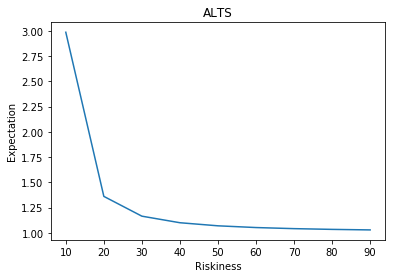

0     92.729317
1     -3.814933
2    -24.172089
3    -33.269931
4     -0.646959
5     82.373405
6    -60.972992
7    -24.900115
8    -18.418601
9     13.643668
10   -92.872192
11    12.370000
12   -22.860465
13     1.062237
14    18.623603
15    10.103636
16    36.971418
17   -38.639514
18    -4.047242
19     1.957817
20   -42.945912
21     4.712003
22   -12.895274
23     4.740350
24   -34.724637
25    -0.439589
26    35.425023
27    -3.596183
28    -5.665748
29    37.889464
30    -9.529491
31     8.002108
32     2.926923
33    53.892297
34    -4.392304
35    36.955592
Name: BTAL, dtype: float64


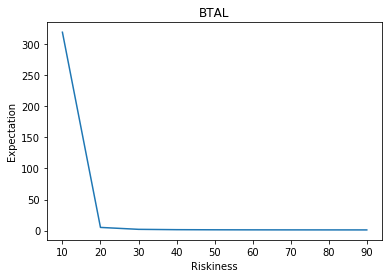

0     -9.492397
1     36.285140
2     35.672509
3     -9.782216
4    -57.776966
5    -52.811745
6     31.430089
7      7.207129
8      4.621260
9     44.328637
10    67.203867
11    13.865958
12   -24.999107
13     0.561777
14   -19.154891
15   -38.370578
16   -30.316757
17    52.901331
18   -26.176978
19    -8.720089
20     1.507648
21   -20.158354
22   -23.700191
23    66.804258
24    -6.649461
25   -12.063588
26   -55.355603
27    20.146631
28   -27.782071
29   -35.890539
30    -4.611208
31    -2.048208
32   -19.178823
33   -43.006827
34    30.664147
35   -57.481576
Name: CHEP, dtype: float64


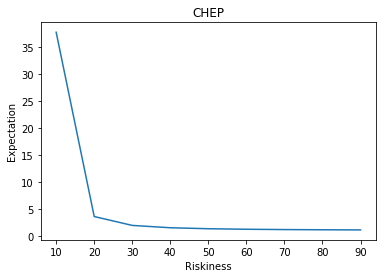

0     -9.111691
1     -2.048208
2     12.758168
3     -2.422354
4     -3.919369
5      5.075902
6      2.791689
7     -4.641772
8     -0.190873
9     -9.093036
10    -2.795065
11     3.557190
12     0.181422
13     6.850549
14    -3.150732
15     1.263090
16     0.151988
17    -3.511748
18     4.181076
19    -0.227323
20    -4.956211
21     0.868275
22     5.221798
23   -12.513708
24    20.086547
25    -9.260555
26    -3.138001
27    -1.684486
28     4.858337
29    -0.965214
30     2.279229
31     2.619661
32     1.525780
33   -20.922887
34    -6.040895
35   -32.295968
Name: CPI, dtype: float64


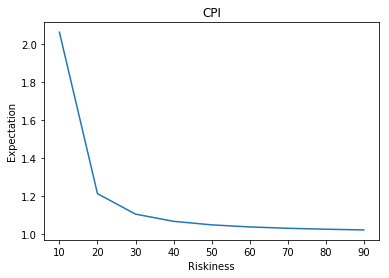

0    -69.808261
1     90.544646
2     30.917773
3     27.158387
4     -4.439679
5     16.250029
6     32.899032
7    -11.925741
8     -3.904153
9     -1.881218
10     8.884943
11    -5.910564
12    21.541192
13    17.137322
14   -21.986805
15    20.545838
16   -17.020943
17    -8.253921
18    -1.370958
19    -8.975285
20     6.129908
21    -5.649545
22    17.051007
23   -21.578628
24    26.690487
25   -17.654487
26   -46.438442
27    24.905457
28    14.142705
29    -0.035597
30    -1.793408
31    22.102807
32    -9.052222
33     5.662699
34    22.547154
35   -55.433523
Name: DIVA, dtype: float64


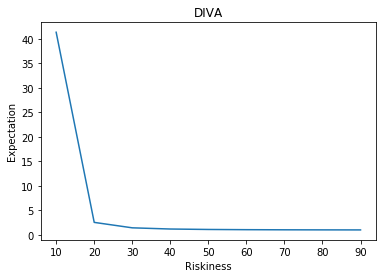

0     -65.885119
1      54.349344
2      62.683212
3      23.022346
4     -30.785602
5     -14.953395
6      80.155664
7       9.473542
8       9.926006
9     -11.028831
10     98.448119
11     -1.517218
12      9.703556
13     39.563465
14    -16.460396
15     -1.179763
16    -21.585621
17      7.390943
18     13.737156
19    -27.182904
20     38.467401
21     -3.612691
22     48.423398
23     32.894720
24     27.565332
25    -34.490516
26    -29.675033
27      6.971083
28      5.916987
29      5.375200
30     25.385416
31     -6.688453
32    -13.703205
33    -49.620304
34     10.374118
35   -102.170935
Name: FLAG, dtype: float64


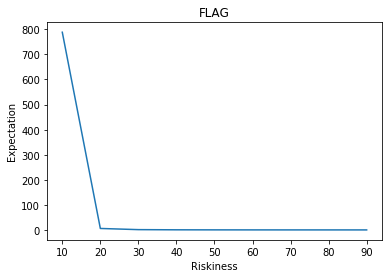

0    -38.142482
1    -16.656057
2     29.179543
3     -8.563612
4      1.734870
5     -2.676308
6     42.911313
7    -12.898343
8      5.264767
9    -17.284103
10    47.259063
11     9.919412
12    -2.606769
13    20.963985
14    -9.451405
15    15.441365
16    10.931470
17     2.687008
18    11.496867
19    -7.801608
20    20.878145
21    17.812784
22    25.404800
23     9.329457
24    37.050454
25   -34.163971
26   -16.587295
27    -8.492145
28    16.086572
29   -10.699624
30    18.070281
31    22.914095
32    -5.984284
33   -50.092763
34     5.929335
35   -45.873980
Name: FTLS, dtype: float64


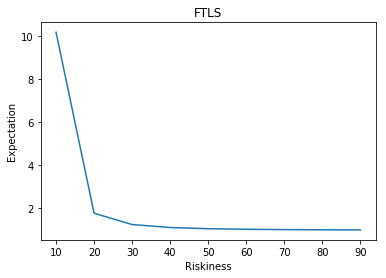

0    -26.036839
1     -5.699679
2     17.986033
3      3.700310
4     -0.381204
5     -6.803277
6     11.568573
7     -0.398491
8      2.893076
9     -8.370000
10     3.135650
11     7.328265
12     3.757690
13     3.262303
14     4.842072
15     2.513793
16    -2.729478
17     2.269057
18     1.571718
19    -1.597426
20     7.415448
21     4.201838
22     1.944726
23    -0.501488
24    10.967369
25   -16.421046
26    -4.257700
27     1.361656
28     3.027938
29   -13.247172
30    10.545611
31    -1.169811
32    -5.119723
33   -32.674765
34     8.185993
35   -32.439938
Name: HDG, dtype: float64


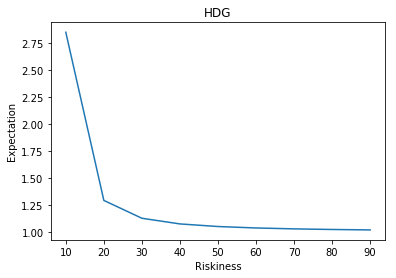

0      11.125366
1       9.378125
2       1.068236
3      -0.494659
4       7.645285
5      10.624624
6     -10.087622
7      -5.030080
8       6.541516
9      -2.428392
10     16.209699
11    -40.150604
12     49.368108
13     12.020263
14      5.450949
15     -0.931741
16      2.598595
17      8.682676
18      1.795810
19    -10.801010
20     20.362846
21     20.101363
22     19.266131
23    -58.048229
24    102.935510
25    -55.395809
26    -21.110323
27     12.757506
28     16.910708
29      8.802296
30     11.599862
31      4.502084
32      6.338608
33    -35.646494
34     18.475172
35   -180.406411
Name: HTUS, dtype: float64


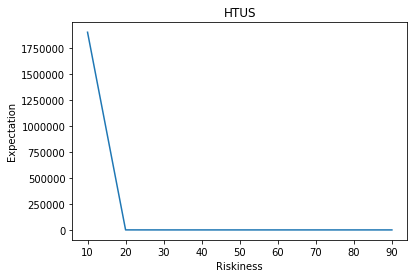

0     -3.539589
1     -2.463973
2     26.653900
3      0.782365
4    -13.338464
5      6.516157
6      6.443554
7      4.367127
8      3.131076
9    -17.109640
10   -11.706105
11    -2.048208
12     8.516604
13    10.014545
14     4.308505
15     1.899662
16     5.816523
17     4.584630
18     2.990552
19    -0.505608
20     4.882858
21     9.041717
22    -0.535402
23     0.595300
24    15.654290
25   -21.663317
26   -11.108183
27     2.904096
28     3.638007
29   -16.748587
30     5.602867
31    -6.983669
32    -0.140548
33   -28.704678
34     6.167764
35   -33.480207
Name: MCRO, dtype: float64


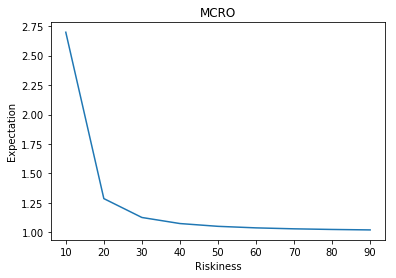

0      5.311037
1     15.433111
2      9.873218
3    -14.175685
4      9.526615
5    -16.264550
6      1.469233
7      9.167996
8     10.083542
9    -16.774238
10    13.593044
11     0.689680
12    10.989089
13     5.379172
14     2.978601
15     8.288537
16    -1.058076
17    11.469761
18     0.879573
19   -13.076428
20     8.447003
21     4.767793
22    -6.561458
23     3.456973
24    13.410794
25   -23.932159
26    -5.290750
27    -0.746940
28    -3.672672
29    -2.699071
30    17.163775
31     6.578022
32     4.286920
33     1.728908
34    -3.929645
35    -5.818268
Name: MNA, dtype: float64


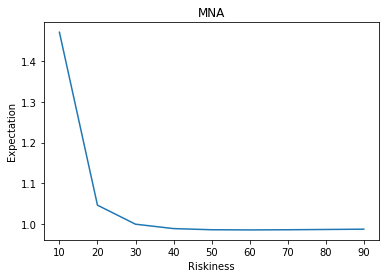

0     24.743970
1    -63.402226
2    -46.751475
3    -49.629844
4     49.974956
5     43.870159
6    -57.207683
7    -41.762267
8      6.636614
9    -28.698435
10   -34.904190
11   -10.323426
12   -11.710088
13   -11.360803
14     1.980440
15     5.085095
16    12.560025
17   -20.809116
18    11.291098
19    25.595450
20     0.940690
21    42.651707
22    -4.900775
23   -20.029329
24    39.982585
25    13.926232
26    -5.192862
27    -4.808461
28    12.977453
29   -52.301461
30    16.409586
31    16.880467
32    -8.372319
33   -58.929674
34    11.448292
35    26.665815
Name: MOM, dtype: float64


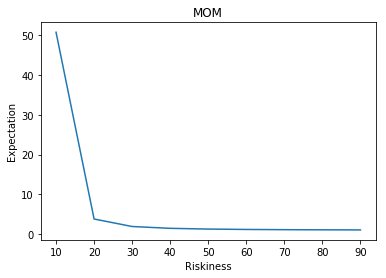

0     -7.920054
1     20.937003
2     -2.318886
3    -13.962633
4      1.788572
5     -9.692355
6     -6.054200
7     -3.154815
8     -3.432836
9     -4.266804
10    -7.050999
11    -6.238062
12    -1.201794
13    -6.277216
14    -7.710678
15    13.612405
16     2.717943
17     6.322146
18    -7.028946
19     5.460268
20   -12.536957
21    -1.740467
22     5.222706
23     4.614661
24    -5.636684
25   -13.959559
26   -10.458620
27    -5.723621
28    -2.615625
29     7.037428
30    23.979607
31    -1.224105
32    -5.891144
33    11.919929
34    13.357606
35    -0.151662
Name: MRGR, dtype: float64


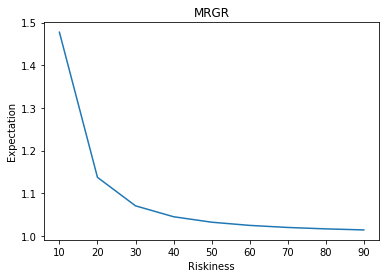

0    -11.340749
1      1.515625
2     21.389264
3      6.279374
4     -5.489369
5      4.857913
6      5.839273
7     -4.770233
8     -2.389386
9    -15.700138
10   -15.542969
11     3.213164
12     0.412296
13    10.482300
14    -2.048208
15     0.358052
16     2.410043
17     2.048712
18     7.132337
19     3.005701
20    -0.372089
21     6.318639
22     3.925912
23     2.240824
24    17.991174
25   -15.574774
26    -6.945402
27    -4.672876
28     4.530763
29    -8.910968
30     6.836322
31     0.561051
32    -2.698809
33   -29.717494
34     0.630094
35   -37.774439
Name: QAI, dtype: float64


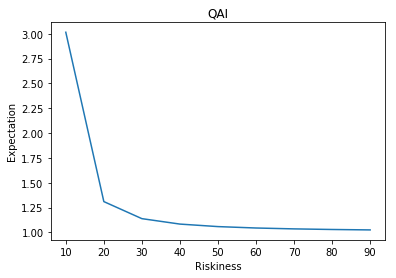

0     -6.910778
1     -2.048208
2     36.633562
3      8.718550
4     -2.048208
5      3.612189
6     30.546600
7      3.402822
8      3.077241
9    -14.747886
10    -8.753065
11   -17.048021
12    36.420275
13    11.607230
14     6.143264
15    -2.831359
16     9.560949
17     5.844449
18     9.241653
19    -2.523145
20     5.081052
21     1.019163
22    -6.047213
23   -14.802085
24    34.230955
25    -8.658177
26    -7.799178
27    -2.860855
28    14.600887
29    -4.965854
30     6.541601
31     9.182427
32    -2.048208
33   -28.887540
34     0.329237
35   -74.154456
Name: QED, dtype: float64


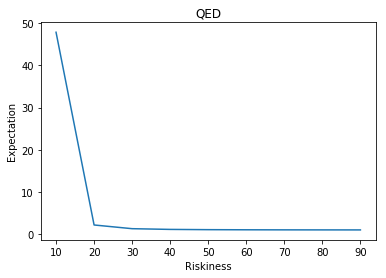

0     17.046640
1    -66.244417
2     34.761554
3      4.675742
4     -2.048208
5     -2.315386
6     22.003226
7      9.955845
8     -9.784122
9     -2.048208
10    -5.166578
11    14.635761
12     6.078424
13    12.237405
14    10.929815
15     2.023659
16    20.701566
17     8.589989
18     3.358655
19     6.375000
20    -2.472925
21    13.390196
22    -0.095517
23    14.193063
24    27.013137
25   -10.511497
26   -14.716620
27    -1.729644
28    -2.639612
29    -3.049424
30    10.707978
31     1.550578
32    -1.151785
33   -56.683169
34     5.531134
35   -81.973006
Name: QLS, dtype: float64


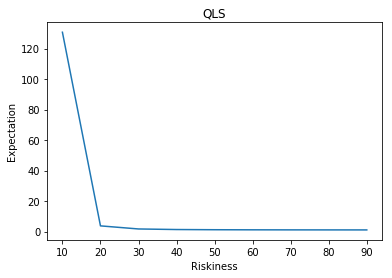

0     -2.373440
1     10.616495
2     -6.642169
3     14.971005
4     -9.668286
5     -0.768497
6     -9.834438
7      1.307524
8     -2.562701
9     -0.416193
10    26.832741
11     1.209864
12   -16.651344
13    -2.048208
14   -13.504316
15   -10.519161
16   -15.065840
17    -3.894482
18     1.158430
19   -12.624584
20     4.632731
21    -4.578873
22    -1.513416
23     3.296523
24   -11.185395
25   -14.975571
26     3.408544
27     6.112582
28   -14.200211
29    -3.688725
30     8.594515
31   -21.346834
32    -3.434209
33    15.398749
34    -7.260896
35   -13.355359
Name: RALS, dtype: float64


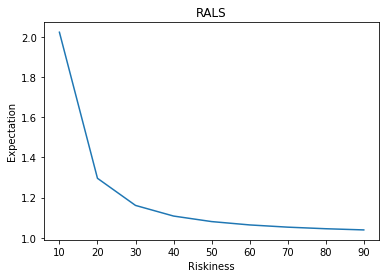

0    -27.233451
1     13.265064
2     57.823932
3     38.438241
4    -15.342876
5     22.793994
6     11.381519
7     -8.565400
8      6.561790
9    -20.046863
10     2.521841
11     7.463778
12    21.256273
13    -0.430621
14   -10.929979
15   -12.238014
16    -1.636308
17   -13.987366
18    39.415987
19    -0.838399
20    10.839336
21    12.803173
22     8.552538
23    24.758242
24    33.803882
25   -51.790271
26     4.543497
27    30.658321
28    10.647870
29   -19.747365
30     7.539010
31   -17.790293
32     5.567905
33   -53.408658
34   -35.234971
35   -61.187937
Name: RLY, dtype: float64


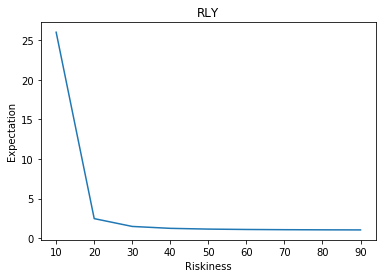

0    -24.530597
1    -14.506282
2     37.738253
3     -2.048208
4     -0.181713
5    -19.281511
6     18.804920
7      0.737260
8     -2.048208
9     -2.048208
10    18.785079
11    -5.676326
12    -3.413616
13   -10.708235
14   -28.714875
15    -0.158789
16   -22.793094
17   -18.417972
18   -11.837734
19   -23.303819
20    35.830581
21   -40.004366
22     7.056546
23    -0.544499
24   -21.067227
25   -19.905351
26    -2.048208
27    23.925818
28     9.597361
29    20.974865
30    -2.048208
31   -15.257650
32   -15.930261
33   -13.611758
34   -13.747089
35   -44.250936
Name: SIZ, dtype: float64


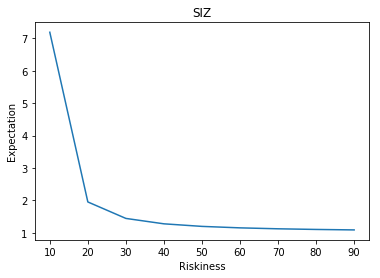

0    -40.335945
1     42.054004
2     -7.625317
3    -12.091223
4    -13.247001
5     -9.243470
6     25.180720
7     14.256665
8     -2.391508
9    -43.141079
10    74.667649
11     2.951832
12   -17.078235
13    -1.205294
14    -9.206285
15    11.373463
16   -38.899167
17     7.517085
18    21.874558
19    -2.426991
20    38.627162
21    10.284481
22     4.793143
23   -10.631139
24    20.088690
25   -45.982125
26    13.926376
27    15.001905
28    39.313231
29   -14.739861
30    -1.556976
31    16.034834
32   -37.724399
33   -56.991140
34   -40.836701
35   -47.892958
Name: VAMO, dtype: float64


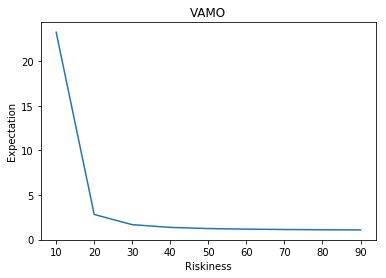

0    -13.055584
1     32.067427
2    -22.403907
3     23.745980
4    -15.086634
5      0.782592
6    -15.456848
7    -23.268955
8     22.799531
9    -11.080793
10   -15.240736
11     5.730057
12   -27.132610
13     0.178368
14   -19.574709
15    -0.540700
16   -11.581570
17   -13.952947
18    -7.431444
19    -3.079196
20    -2.822107
21    13.185482
22    -1.793890
23    16.258357
24     4.193970
25   -18.921635
26    -4.067351
27     7.056526
28    -0.795100
29    -4.801700
30    -1.546210
31    17.269415
32     1.151335
33   -10.634967
34    -8.977153
35   -36.187359
Name: WTMF, dtype: float64


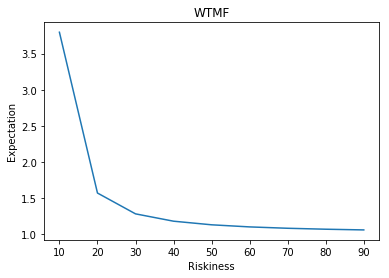

In [5]:
#目前只讀取一份檔案
%matplotlib inline
data_file = '../../HW1/ETF_data_set/return_data/Alternatives ETF List (35)/Alternatives ETF List (35)_return.csv';
df = pd.read_csv(data_file)
etf_list = list(df.columns)[1:]

rmin = min(df.mean(axis=0))
rmin

for etf_name in etf_list:
    arr_returns = df[etf_name] - rfrate
    #調整數量級
    arr_returns = arr_returns*1000
    print(arr_returns)
    arr_x,arr_y = cal_riskiness_index(arr_returns)
    plt.title(etf_name)
    plt.plot(arr_x,arr_y)
    plt.xlabel('Riskiness')
    plt.ylabel('Expectation')
    plt.show()

In [6]:
df = df.iloc[:,1:]
df.mean(axis=0)

ALTS    0.000366
BTAL    0.002481
CHEP   -0.002739
CPI     0.000420
DIVA    0.004604
FLAG    0.007028
FTLS    0.004362
HDG     0.000788
HTUS    0.001049
MCRO    0.001060
MNA     0.003742
MOM    -0.002604
MRGR    0.001235
QAI     0.000605
QED     0.002844
QLS     0.001580
RALS   -0.000857
RLY     0.002610
SIZ    -0.003636
VAMO   -0.000599
WTMF   -0.001980
dtype: float64

In [7]:
min(df.mean(axis=0))

-0.0036360711177154514

# f1()跟上述的cal_riskiness_index()一樣，皆用來計算riskiness r

In [8]:
def f1(x):
    #return math.exp(-1*arr_returns[0]/x) + math.exp(-1*arr_returns[1]/x) + math.exp(-1*arr_returns[2]/x) - 3
    return sum( np.exp(-1*arr_returns/x) ) - len(arr_returns)


In [19]:
for etf_name in etf_list:
    arr_returns = df[etf_name] - rfrate
    arr_returns = arr_returns*1000      #調整數量級
    guess = 10**(-5)
    while (guess<1000):
        risk2 = fsolve(f1,guess)
        if risk2 != guess:
            break
        guess = guess*10
    print('%s指標值:  %f' %(etf_name,risk2) )

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


ALTS指標值:  0.771797
BTAL指標值:  1442.850224
CHEP指標值:  0.191204
CPI指標值:  0.662590
DIVA指標值:  0.165233
FLAG指標值:  151.487876
FTLS指標值:  0.222019
HDG指標值:  0.627811
HTUS指標值:  1565043319816945.000000
MCRO指標值:  0.554239
MNA指標值:  29.712606
MOM指標值:  0.176858
MRGR指標值:  2442327342663927.000000
QAI指標值:  0.366953
QED指標值:  235.407889
QLS指標值:  664713662760014.750000
RALS指標值:  4132833502379418.000000
RLY指標值:  0.181903
SIZ指標值:  0.264375
VAMO指標值:  0.193537
WTMF指標值:  0.415029
